In [26]:
# 데이터 구성하기 : Series, DataFrame
import pandas as pd
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split
# 데이터 scaling
from sklearn.preprocessing import StandardScaler
# 분류 Decision Tree
from sklearn.tree import DecisionTreeClassifier
# 분류 Random Forest
from sklearn.ensemble import RandomForestClassifier
# 분류 Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# 분류 NN(MLPClassifier)
from sklearn.neural_network import MLPClassifier

# 모델 성능 평가 : Precision, Recall, F1 Score, ROC Curve, AUC
from sklearn.metrics import precision_score,recall_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

# 경고문 제거
import warnings
warnings.filterwarnings('ignore')

In [27]:
import matplotlib as mpl

# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams['font.family']='NanumGothic'

In [28]:
df_raw = pd.read_csv('/home/piai/Bigdata 실습과제/2. Big Data 분석/HMEQ.csv', encoding = 'euc-kr')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [29]:
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [30]:
df_raw['JOB'].fillna('Other', inplace=True)
df_raw.fillna(df_raw.mean(), inplace=True)

In [31]:
df_raw_dummy=pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [32]:
# 설명변수, 목표변수 데이터 저장
df_raw_x=df_raw_dummy.drop('BAD', axis=1, inplace=False)
df_raw_y=df_raw_dummy['BAD']

In [33]:
df_train_x, df_test_x, df_train_y, df_test_y=train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (2623, 18)
train data Y size : (2623,)
test data X size : (1125, 18)
test data Y size : (1125,)


In [34]:
model=['Decision Tree', 'RandomForest', 'GradientBoosting', 'NeuralNet']
train_accuracy=[]; test_accuracy=[]
model_auc=[]
model_precision=[]; model_recall=[]
model_f1_score=[]

Confusion matrix: 
[[1013    8]
 [  74   30]] 

              precision    recall  f1-score   support

           0      0.932     0.992     0.961      1021
           1      0.789     0.288     0.423       104

    accuracy                          0.927      1125
   macro avg      0.861     0.640     0.692      1125
weighted avg      0.919     0.927     0.911      1125



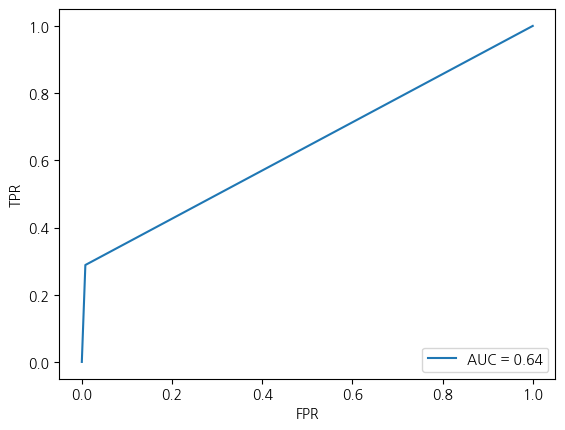

In [35]:
dt_model=DecisionTreeClassifier(max_depth=6, min_samples_split=20, min_samples_leaf=10, random_state=1234)
dt_model.fit(df_train_x, df_train_y)

train_accuracy.append(dt_model.score(df_train_x, df_train_y))
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

y_pred=dt_model.predict(df_test_x)

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)),"\n")
print(classification_report(df_test_y, y_pred, digits=3))

fpr, tpr, thresholds=roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr, tpr)

model_auc.append(roc_auc)

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

In [36]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))

Confusion matrix : 
[[1021    0]
 [  84   20]] 

              precision    recall  f1-score   support

           0      0.924     1.000     0.960      1021
           1      1.000     0.192     0.323       104

    accuracy                          0.925      1125
   macro avg      0.962     0.596     0.642      1125
weighted avg      0.931     0.925     0.902      1125



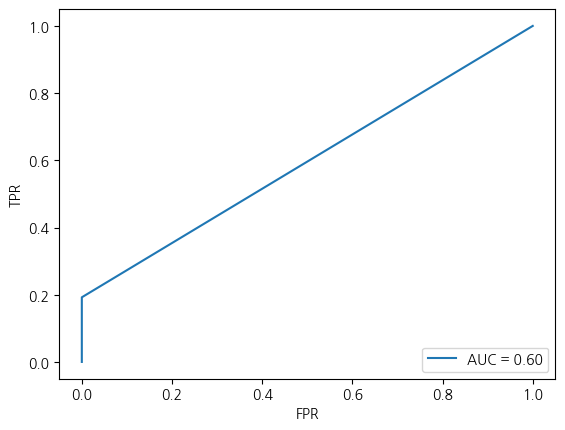

In [37]:
# 랜덤포레스트
rf_model=RandomForestClassifier(min_samples_leaf=20, max_depth=6, n_estimators=100, random_state=1234)
rf_model.fit(df_train_x, df_train_y)

train_accuracy.append(rf_model.score(df_train_x, df_train_y))
test_accuracy.append(rf_model.score(df_test_x, df_test_y))

y_pred=rf_model.predict(df_test_x)

print("Confusion matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)), "\n")
print(classification_report(df_test_y, y_pred, digits=3))

fpr, tpr, thresholds=roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr, tpr)

model_auc.append(roc_auc)

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

In [38]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))

Confusion matrix : 
[[1020    1]
 [  56   48]] 

              precision    recall  f1-score   support

           0      0.948     0.999     0.973      1021
           1      0.980     0.462     0.627       104

    accuracy                          0.949      1125
   macro avg      0.964     0.730     0.800      1125
weighted avg      0.951     0.949     0.941      1125



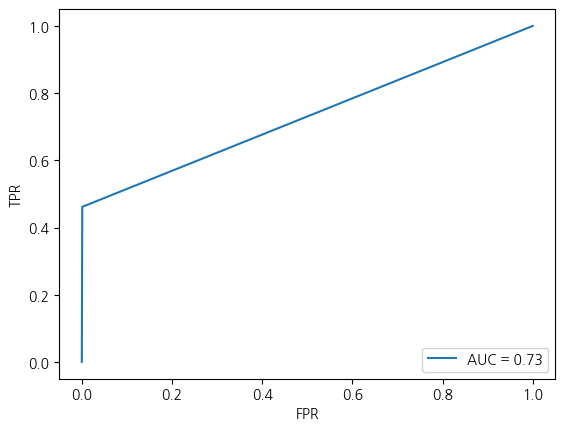

In [39]:
# gradient boosting
gb_final=GradientBoostingClassifier(min_samples_leaf=15, max_depth=6, n_estimators=100, learning_rate=0.1, random_state=1234)
gb_final.fit(df_train_x, df_train_y)

train_accuracy.append(gb_final.score(df_train_x, df_train_y))
test_accuracy.append(gb_final.score(df_test_x, df_test_y))

y_pred=gb_final.predict(df_test_x)

print("Confusion matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)), "\n")
print(classification_report(df_test_y, y_pred, digits=3))

fpr, tpr, thresholds=roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr, tpr)

model_auc.append(roc_auc)

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

In [40]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))

In [41]:
v_feature_names=df_train_x.columns

scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled, columns=v_feature_names)

In [42]:
df_scaled_train_x, df_scaled_test_x=train_test_split(df_scaled, test_size=0.3, random_state=1234)
print("train data X size :{}".format(df_scaled_train_x.shape))
print("test data Y size :{}".format(df_scaled_test_x.shape))

train data X size :(2623, 18)
test data Y size :(1125, 18)


Confusion matrix : 
[[1018    3]
 [  48   56]] 

              precision    recall  f1-score   support

           0      0.955     0.997     0.976      1021
           1      0.949     0.538     0.687       104

    accuracy                          0.955      1125
   macro avg      0.952     0.768     0.831      1125
weighted avg      0.954     0.955     0.949      1125



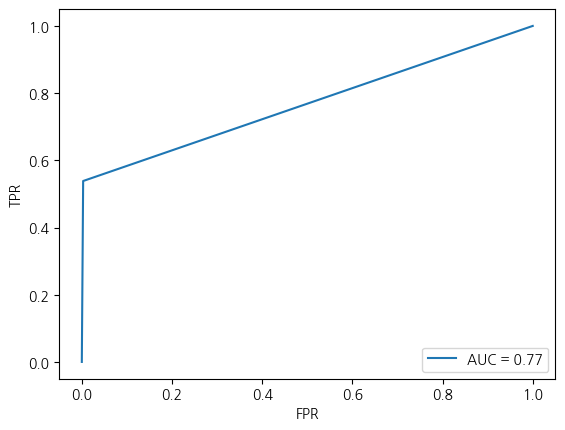

In [43]:
# 인공신경망
nn_model=MLPClassifier(hidden_layer_sizes=(80,80), activation='relu', solver='adam', random_state=1234)
nn_model.fit(df_scaled_train_x, df_train_y)

#책 코드랑은 같지만 결과는 미묘하게 다르게 나오는데 책이랑 결과 같게 하고 싶으면 아래 코드를 적용
# nn_model=MLPClassifier(hidden_layer_sizes=(80,80), activation='relu', solver='adam', batch_size=100, random_state=1234)
# nn_model.fit(df_scaled_train_x, df_train_y)


train_accuracy.append(nn_model.score(df_scaled_train_x, df_train_y))
test_accuracy.append(nn_model.score(df_scaled_test_x, df_test_y))

y_pred=nn_model.predict(df_scaled_test_x)

print("Confusion matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)), "\n")
print(classification_report(df_test_y, y_pred, digits=3))

fpr, tpr, thresholds=roc_curve(df_test_y, y_pred)
roc_auc=auc(fpr, tpr)

model_auc.append(roc_auc)

plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

In [44]:
model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))

In [45]:
df_eval=pd.DataFrame(index=model)
df_eval['TrainAccuracy']=train_accuracy; df_eval['TestAccuracy']=test_accuracy
df_eval['AUC']=model_auc
df_eval['Precision']=model_precision; df_eval['Recall']=model_recall
df_eval['F1 Score']=model_f1_score
df_eval.round(3)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1 Score
Decision Tree,0.938,0.927,0.640,0.789,0.288,0.423
RandomForest,0.927,0.925,0.596,1.000,0.192,0.323
GradientBoosting,0.991,0.949,0.730,0.980,0.462,0.627
NeuralNet,1.000,0.955,0.768,0.949,0.538,0.687


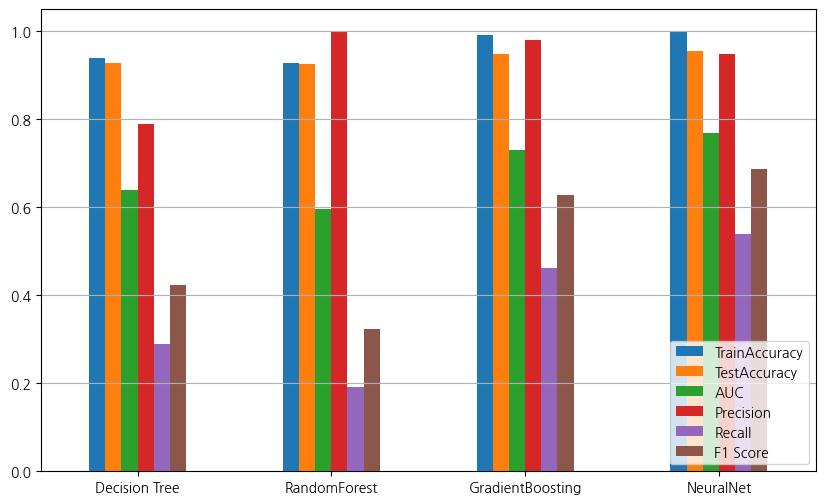

In [46]:
df_eval.plot.bar(rot=0, figsize=(10,6))
plt.legend(loc='lower right')
plt.grid(axis='y')